In [25]:

import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import copy

# Fijando los parametros del modelo.


In [2]:
tau = 0.3#transmission rate
gamma = 1.0 #recovery rate

rho = 0.005#initial fraction infected


# Funciones Propias Auxiliares Utiles

In [3]:
#Codigo para partir las simulaciones


def get_listados_nodos_a_tiempo(simulacion, tiempo):
    
    estados = simulacion.get_statuses(time=tiempo)
    #dictionario nodo: status

    susceptibles = []
    infectados = []
    recuperados = []

    #print(type(estados[0]))

    for nodo in estados.keys():
        status = estados[nodo]
        if(status == 'S'):
            susceptibles.append(nodo)
        elif(status == 'I'):
            infectados.append(nodo)
        else:
            recuperados.append(nodo)
            
    return susceptibles,infectados, recuperados


In [4]:
# Función que elimina enlaces
def elimina_enlaces(grafo,prob):
    """
        Probabilidad con la que eliminar un enlace con porbabilidad uniforme
    """
    
    
    for edge in list(grafo.edges):
        
        r= np.random.uniform(0, 1)
        if(r<= prob):
            u,v = edge
            grafo.remove_edge(u,v)



    return grafo


In [11]:

def encuentra_tiempo_limite_alcanzado(tabla_tiempos,tabla_infectados, limite):
    """
        Encuentra el primer tiempo t a partir del cual el numero de infectados >= limite
    """
    
    assert len(tabla_tiempos) == len(tabla_infectados), "Las tablas deben de tener le mismo tamaño"
    
    index = -1
    
    for i in range(len(tabla_infectados)):
        if(tabla_infectados[i]>= limite):
            index = i
            break
            
    if(index==-1):
        print("ATENCION: El limite no se supera!")
        return -1
    else:
        print("El limite se supera en:", tabla_tiempos[index])
        print("El index es: ", index)
        return tabla_tiempos[index]
        
        

# Simulacion memoria fijando t = 1.80

In [8]:
# GENERAMOS EL GRAFO


#Erdos-renyi
N = 10**5#number of individuals
kave = 10#expected number of partners
g_erdosrenyi_1M_ejem3 = nx.fast_gnp_random_graph(N, kave/(N-1))#Erdo's-Re'nyi graph

print('Generated graph G with {} nodes'.format(N))
print('Generated graph G with  edges', len(list(g_erdosrenyi_1M_ejem3.edges))," enlaces")



#-----------------SIMULACION PARTE 1

sim_erdosrenyi_1M_part1_ejem3= EoN.fast_SIR(g_erdosrenyi_1M_ejem3, tau, gamma, rho=rho, return_full_data = True)
print("Simulacion  parte 1 finalizada")

#Esto lo haria para quedarme con la evolucion de la grafica hasta el tiempo t
tiempos_parte1_ejem3, estados_parte1_ejem3= sim_erdosrenyi_1M_part1_ejem3.summary()
infectados_parte1_ejem3 = estados_parte1_ejem3['I']

#A partir de tiempo t, cojo los nodos que se encuentran en cada estado



tiempo=1.8
simulacion = sim_erdosrenyi_1M_part1_ejem3
susceptibles_ejem3,infectados_ejem3, recuperados_ejem3 = get_listados_nodos_a_tiempo(simulacion, tiempo)




#--------------SIMULACION PARTE 2

#Modifico en grafo

np.random.seed (123) #Semilla para la simluacion


prob = 0.5 #probabilidad de borrar un enlace
g_erdosrenyi_1M_ejem3 = elimina_enlaces(g_erdosrenyi_1M_ejem3,prob)
print("Numero de enlaces del grafo(tras la modificacion):", len(list(g_erdosrenyi_1M_ejem3.edges) ))


#simulo de nuevo(ofo con paserle bien las proporciones que no lo comprueba)
sim_erdosrenyi_1M_part2_ejem3= EoN.fast_SIR(g_erdosrenyi_1M_ejem3, tau, gamma,  return_full_data = True, initial_infecteds=infectados_ejem3, initial_recovereds=recuperados_ejem3 )
print("Simulacion parte 2 finalizada")

tiempos_parte2_ejem3, estados_parte2_ejem3= sim_erdosrenyi_1M_part2_ejem3.summary()
tiempos_parte2_ejem3 = tiempos_parte2_ejem3[1:] #ya que en tiempo 0 hay 0 infectados
tiempos_parte2_ejem3 = [x + tiempo for x in tiempos_parte2_ejem3] # desplazamos los tiempos desde timepo
infectados_parte2_ejem3 = estados_parte2_ejem3['I']
infectados_parte2_ejem3 = infectados_parte2_ejem3[1:] #ya que en tiempo 0 hay 0 infectados



#Reconpongo la parte1 de tiempos (hasta tiempo) con la parte2(entera), ojo esto tiene que ser asi
index = 0
while(tiempo > tiempos_parte1_ejem3[index]):
    index +=1

        
tiempos_finales_ejem3= list(tiempos_parte1_ejem3[:index+1]) + list(tiempos_parte2_ejem3)
infectados_finales_ejem3 = list(infectados_parte1_ejem3[:index+1]) + list(infectados_parte2_ejem3)

print("Simulacion completada")


Generated graph G with 100000 nodes
Generated graph G with  edges 500378  enlaces
Simulacion  parte 1 finalizada
Numero de enlaces del grafo(tras la modificacion): 250387
Simulacion parte 2 finalizada
Simulacion completada


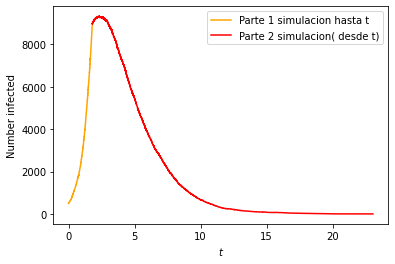

In [18]:
#Representacion

#Pintamos solo la parte 1 de la simulacion
lista1= list(tiempos_parte1_ejem3[:index+1])
lista2= list(infectados_parte1_ejem3[:index+1])
plt.plot(lista1,lista2 , label = 'Parte 1 simulacion hasta t', color = 'orange')

#Pintamos solo la parte 2 de la simulacion 

plt.plot(tiempos_parte2_ejem3,infectados_parte2_ejem3 , label = 'Parte 2 simulacion( desde t)', color = 'red')
#plt.plot(1.80,0, '*')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

# Simulaciones con diferentes probabilidades y t=1.80 fijado

In [37]:
sim_erdosrenyi_1M_part1_ejem3 = np.empty([10],dtype=object)
tiempos_parte2_ejem3 = np.empty([10],dtype=object)
infectados_parte2_ejem3 = np.empty([10],dtype=object)
prob = 0.1 #probabilidad de borrar un enlace

tiempos_finales_ejem3 = np.empty([10],dtype=object)
infectados_finales_ejem3 = np.empty([10],dtype=object)


#Erdos-renyi
N = 10**5#number of individuals
kave = 10#expected number of partners
g_erdosrenyi_1M_ejem3 = nx.fast_gnp_random_graph(N, kave/(N-1))#Erdo's-Re'nyi graph
print('Generated graph G with {} nodes'.format(N))
print('Generated graph G with  edges', len(list(g_erdosrenyi_1M_ejem3.edges))," enlaces")
#-----------------SIMULACION PARTE 1
sim_erdosrenyi_1M_part1_ejem3[i]= EoN.fast_SIR(g_erdosrenyi_1M_ejem3, tau, gamma, rho=rho, return_full_data = True)
print("Simulacion  parte 1 finalizada")
#Esto lo haria para quedarme con la evolucion de la grafica hasta el tiempo t
tiempos_parte1_ejem3, estados_parte1_ejem3= sim_erdosrenyi_1M_part1_ejem3[i].summary()
infectados_parte1_ejem3 = estados_parte1_ejem3['I']
#A partir de tiempo t, cojo los nodos que se encuentran en cada estado
tiempo=1.8
simulacion = sim_erdosrenyi_1M_part1_ejem3[i]
susceptibles_ejem3,infectados_ejem3, recuperados_ejem3 = get_listados_nodos_a_tiempo(simulacion, tiempo)



grafo_original = g_erdosrenyi_1M_ejem3

grafo_copia = grafo_original.copy()
g_erdosrenyi_1M_ejem3 = grafo_copia
print("Copia de grafo finalizada")
for i in range(0,10):   

   


    #--------------SIMULACION PARTE 2

    #Modifico en grafo

    np.random.seed (123) #Semilla para la simluacion




    g_erdosrenyi_1M_ejem3 = elimina_enlaces(g_erdosrenyi_1M_ejem3,prob)
    print("----->Probabilidad:", prob)
    print("Numero de enlaces del grafo(tras la modificacion):", len(list(g_erdosrenyi_1M_ejem3.edges) ))
    prob = prob + 0.1

    #simulo de nuevo(ofo con paserle bien las proporciones que no lo comprueba)
    sim_erdosrenyi_1M_part2_ejem3= EoN.fast_SIR(g_erdosrenyi_1M_ejem3, tau, gamma,  return_full_data = True, initial_infecteds=infectados_ejem3, initial_recovereds=recuperados_ejem3 )
    #print("Simulacion parte 2 finalizada")

    tiempos_parte2_ejem3[i] , estados_parte2_ejem3= sim_erdosrenyi_1M_part2_ejem3.summary()
    tiempos_parte2_ejem3[i]  = tiempos_parte2_ejem3[i] [1:] #ya que en tiempo 0 hay 0 infectados
    tiempos_parte2_ejem3[i]  = [x + tiempo for x in tiempos_parte2_ejem3[i] ] # desplazamos los tiempos desde timepo
    infectados_parte2_ejem3[i] = estados_parte2_ejem3['I']
    infectados_parte2_ejem3[i] = infectados_parte2_ejem3[i][1:] #ya que en tiempo 0 hay 0 infectados



    #Reconpongo la parte1 de tiempos (hasta tiempo) con la parte2(entera), ojo esto tiene que ser asi
    index = 0
    while(tiempo > tiempos_parte1_ejem3[index]):
        index +=1


    tiempos_finales_ejem3[i]= list(tiempos_parte1_ejem3[:index+1]) + list(tiempos_parte2_ejem3[i])
    infectados_finales_ejem3[i] = list(infectados_parte1_ejem3[:index+1]) + list(infectados_parte2_ejem3[i])


    grafo_copia = grafo_original.copy()
    g_erdosrenyi_1M_ejem3 = grafo_copia

    print("----->Simulacion ", i, "completada")


Generated graph G with 100000 nodes
Generated graph G with  edges 500701  enlaces
Simulacion  parte 1 finalizada
Copia de grafo finalizada
----->Probabilidad: 0.1
Numero de enlaces del grafo(tras la modificacion): 450916
----->Simulacion  0 completada
----->Probabilidad: 0.2
Numero de enlaces del grafo(tras la modificacion): 400768
----->Simulacion  1 completada
----->Probabilidad: 0.30000000000000004
Numero de enlaces del grafo(tras la modificacion): 350311
----->Simulacion  2 completada
----->Probabilidad: 0.4
Numero de enlaces del grafo(tras la modificacion): 300401
----->Simulacion  3 completada
----->Probabilidad: 0.5
Numero de enlaces del grafo(tras la modificacion): 250535
----->Simulacion  4 completada
----->Probabilidad: 0.6
Numero de enlaces del grafo(tras la modificacion): 200428
----->Simulacion  5 completada
----->Probabilidad: 0.7
Numero de enlaces del grafo(tras la modificacion): 150351
----->Simulacion  6 completada
----->Probabilidad: 0.7999999999999999
Numero de enlac

In [42]:
#descarta simulacion[9] ya que la prb es del 0.99999

[500, 499, 500, 501, 500, 501, 500, 501, 502, 503]


In [43]:
print(infectados_finales_ejem3[0][0:10])

[500, 499, 500, 501, 500, 501, 500, 501, 502, 503]


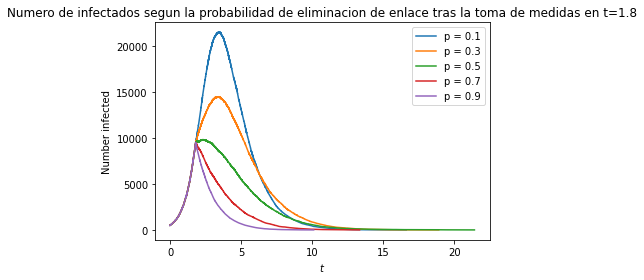

In [52]:
#Representacion

#Pintamos solo la parte 1 de la simulacion


#Pintamos solo la parte 2 de la simulacion 

plt.plot(tiempos_finales_ejem3[0],infectados_finales_ejem3[0] , label = 'p = 0.1')
plt.plot(tiempos_finales_ejem3[2],infectados_finales_ejem3[2] , label = 'p = 0.3')

plt.plot(tiempos_finales_ejem3[4],infectados_finales_ejem3[4] , label = 'p = 0.5')
plt.plot(tiempos_finales_ejem3[6],infectados_finales_ejem3[6] , label = 'p = 0.7')

plt.plot(tiempos_finales_ejem3[8],infectados_finales_ejem3[8] , label = 'p = 0.9')


plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.title('Numero de infectados segun la probabilidad de eliminacion de enlace tras la toma de medidas en t=1.8')
plt.legend()
plt.show()